# Loading the Libraries


In [91]:
# Import necessary libraries
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

# Dataset

In [92]:
#Loading the dataset
import zipfile


# Unzip the downloaded file
zip_ref = zipfile.ZipFile("/content/casting_data.zip")
zip_ref.extractall()
zip_ref.close()

In [93]:
train_dir = "/content/casting_data/train"
test_dir = "/content/casting_data/test"

In [94]:
! ls casting_data

test  train


In [95]:
! ls casting_data/train

defective  non-defective


In [96]:
import os

# walk through piza_steak direcotry and list number of files

for dirpath,dirnames,filenames in os.walk("casting_data"):
  print(f"there are {len(dirnames)} directorteries and{len(filenames)} images in '{dirpath}'.")

there are 2 directorteries and0 images in 'casting_data'.
there are 2 directorteries and0 images in 'casting_data/test'.
there are 0 directorteries and453 images in 'casting_data/test/defective'.
there are 0 directorteries and262 images in 'casting_data/test/non-defective'.
there are 2 directorteries and0 images in 'casting_data/train'.
there are 0 directorteries and3758 images in 'casting_data/train/defective'.
there are 0 directorteries and2875 images in 'casting_data/train/non-defective'.


In [97]:
# Lets visalize our images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  # setup the target direcotry(we'll view imaged from here)
  target_folder=target_dir+target_class
  random_image=random.sample(os.listdir(target_folder),1)

  img=mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape:{img.shape}") # show the shape of the image
  return img


Image shape:(300, 300, 3)


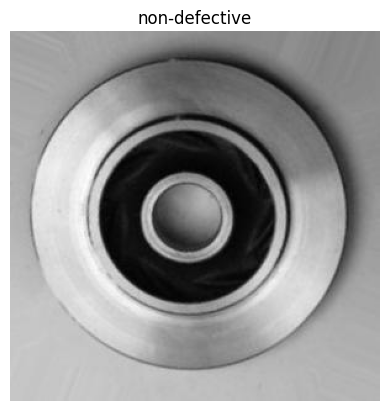

In [98]:
# view the image

img = view_random_image(target_dir="casting_data/train/",
                        target_class="non-defective")

Image shape:(300, 300, 3)


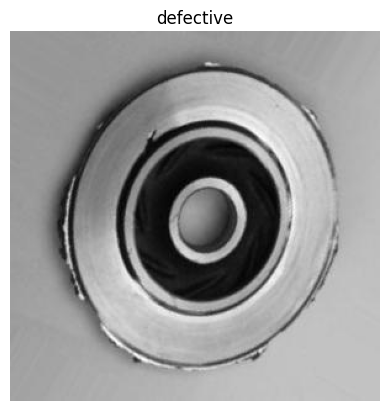

In [99]:
img = view_random_image(target_dir="casting_data/train/",
                        target_class="defective")

# Training the dataset



In [100]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,         # Normalize pixel values to [0,1]
    rotation_range=15,         # Random rotation up to 15 degrees
    width_shift_range=0.1,     # Horizontal shift
    height_shift_range=0.1,    # Vertical shift
    shear_range=0.1,           # Shear transformation
    zoom_range=0.1,            # Zoom in/out
    horizontal_flip=True       # Flip images horizontally
)

# Only rescale for test data
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# set the seed
tf.random.set_seed(42)
# Import data from directories and turn in into batches
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=16,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

valid_data=test_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=16,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42,
                                             shuffle=False)

Found 6633 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


# Training the CNN Model


In [101]:
# Build a CNN model
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation="sigmoid")


])

# Compile our CNN
model.compile(loss="binary_crossentropy",
              # optimizer=tf.keras.optiAmizers.Adam(),
              metrics=["accuracy"])

model.fit(train_data,epochs=1,steps_per_epoch=len(train_data),
          validation_data=valid_data,
          validation_steps=len(valid_data))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


415/415 ━━━━━━━━━━━━━━━━━━━━ 98s 229ms/step - accuracy: 0.5905 - loss: 0.6836 - val_accuracy: 0.7986 - val_loss: 0.4557


# Getting Accuracy

In [102]:
# Get the true labels from the validation data
true_labels = valid_data.classes

# Get the predictions from the model (probabilities)
predictions = model.predict(valid_data, batch_size=16)

# Convert probabilities to binary predictions (1 if prob > 0.5, else 0)
predictions = (predictions > 0.5).astype("int32")

# Calculate accuracy: Number of correct predictions / Total number of predictions
accuracy = np.sum(predictions == true_labels) / len(true_labels)

loss, accuracy = model.evaluate(valid_data)

print(f"Test Accuracy: {accuracy * 100:.2f}%")


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8073 - loss: 0.4330
Test Accuracy: 79.86%


#Evaluting the model


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Classification Report:
               precision    recall  f1-score   support

    defective       0.90      0.77      0.83       453
non-defective       0.68      0.84      0.75       262

     accuracy                           0.80       715
    macro avg       0.79      0.81      0.79       715
 weighted avg       0.82      0.80      0.80       715

Confusion Matrix:
[[350 103]
 [ 41 221]]


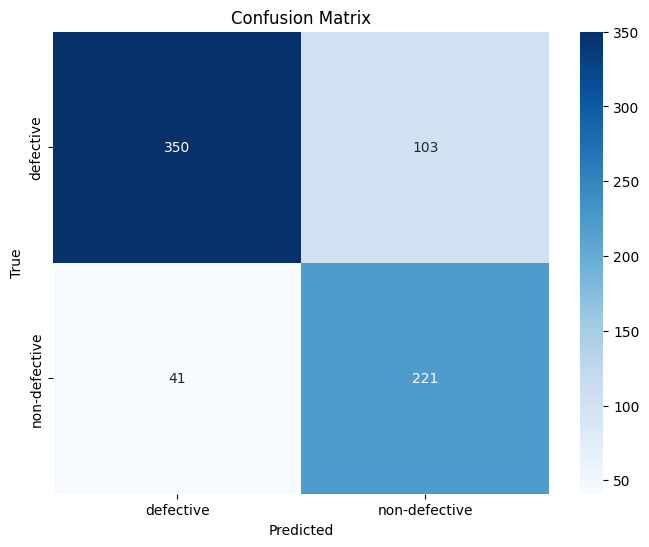

In [103]:
predictions = model.predict(valid_data, batch_size=32)
predictions = (predictions > 0.5).astype("int32")  # Sigmoid output thresholded at 0.5

# Get the true labels for the test set
true_labels = valid_data.classes

# Display classification report for precision, recall, f1-score, and accuracy
print("Classification Report:")
print(classification_report(true_labels, predictions, target_names=valid_data.class_indices.keys()))

# Compute confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=valid_data.class_indices.keys(), yticklabels=valid_data.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [104]:
# Save the trained model to a file
model.save("cnn_defect_detection_model.h5")
